
**Problem Statement:**

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

In this case study we aim to do a market analysis and provide Aerofit with insights to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to new customers. We will investigate whether there are differences across the product with respect to customer characteristics.

The aim is also to perform descriptive analytics to create a customer profile for each AeroFit treadmill product and compute all conditional and marginal probabilities.


**Column Profiling:**
* **Product:** Product Purchased KP281, KP481, or KP781
* **Age:** In years
* **Gender:** Male/Female
* **Education:** in years
* **MaritalStatus:** single or partnered
* **Usage:** average number of times the customer plans to use the treadmill each week
* **Income:** annual income (in \$)
* **Fitness:** self-rated fitness on a 1-to-5 scale, where 1 is poor shape and 5 is the
excellent shape.
* **Miles:** average number of miles the customer expects to walk/run each week

**Product Portfolio:**
1. The **KP281** is an entry-level treadmill that sells for \$1,500.
2. The **KP481** is for mid-level runners that sell for \$1,750.
3. The **KP781** treadmill has advanced features that sell for \$2,500.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
warnings.filterwarnings('ignore')

/kaggle/input/aerofit/aerofit_treadmill.csv


### Importing the Dataset & performing simple EDA

In [2]:
df = pd.read_csv('/kaggle/input/aerofit/aerofit_treadmill.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [3]:
df.shape

(180, 9)

In [4]:
df["Gender"]=df["Gender"].astype("category")
df["MaritalStatus"]=df["MaritalStatus"].astype("category")
df["Product"]=df["Product"].astype("category")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


In [6]:
df.describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


**Inference:** <br />

This dataset comprises 180 rows and 9 columns, including 6 integer columns and 3 category columns. There are no null or missing values across any of the columns. Among the categorical columns, there are three unique products, with KP281 being the most prevalent. The age of individuals in the dataset spans from 18 to 50, with an average age of 28.78. Notably, there is a noticeable gender imbalance, with a higher representation of males than females. Furthermore, the standard deviations for the "Income" and "Miles" variables are notably high, suggesting the possible presence of outliers in these data points


### Adding new columns to further analysis 

In [7]:
df['Age_Category']=pd.cut(df['Age'],bins=[17,29,39,50],labels=['Young','Mid-aged','Old'])
df['Income_Category']=pd.cut(df['Income'],bins=[29000,50000,75000,105000],labels=['Low','Medium','High'])

## Visualization and Exploration

## Univariate Analysis

### Product

In [8]:
df['Product'].value_counts()

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

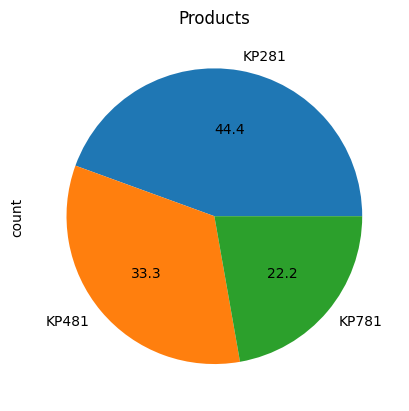

In [9]:
df['Product'].value_counts().plot(kind='pie',autopct="%.1f")
plt.title('Products')
plt.show()

**Inference:** <br/>
Among users, 44.4% express a preference for the KP281 treadmill, while 33.3% favor the KP481 treadmill, and only 22.2% opt for the KP781 treadmill.


### Age

In [10]:
df['Age'].value_counts().head()

Age
25    25
23    18
24    12
26    12
28     9
Name: count, dtype: int64

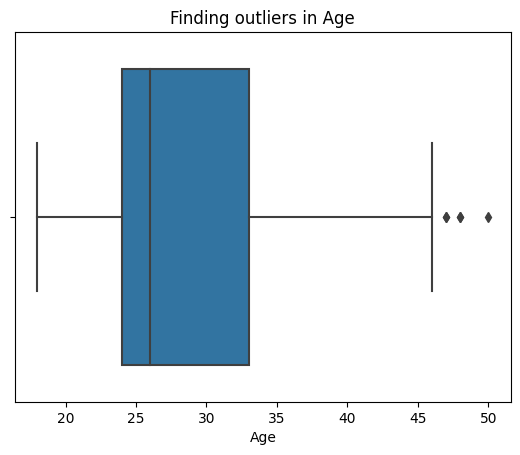

In [11]:
sns.boxplot(x='Age', data=df)
plt.title('Finding outliers in Age')
plt.show()

**Inference:** <br/>
Age column is having very few outliers.


### Gender

In [12]:
df['Gender'].value_counts()

Gender
Male      104
Female     76
Name: count, dtype: int64

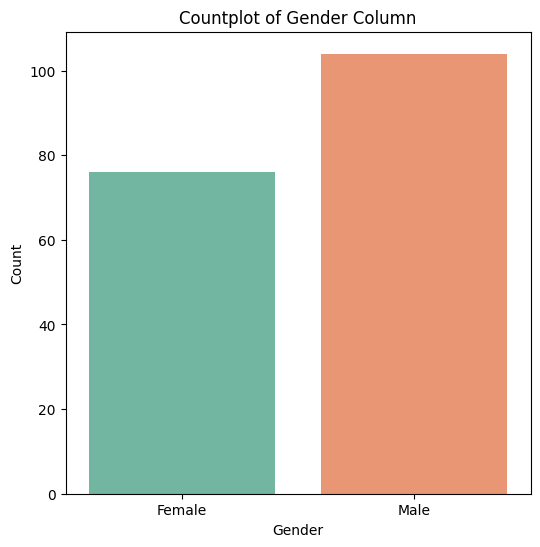

In [13]:
plt.figure(figsize=(6, 6))
sns.countplot(x='Gender', data=df, palette='Set2')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Countplot of Gender Column')
plt.show()

**Inference:** <br/>
In this dataset, the number of male users exceeds that of female users.

### Marital Status

In [14]:
df['MaritalStatus'].value_counts()

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

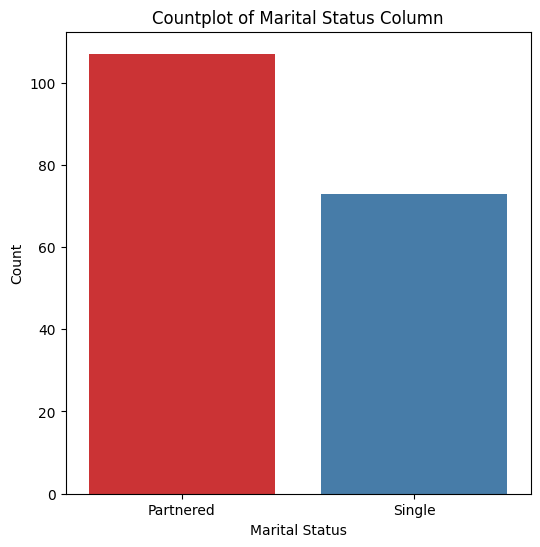

In [15]:
plt.figure(figsize=(6, 6))
sns.countplot(x='MaritalStatus', data=df, palette='Set1')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Countplot of Marital Status Column')
plt.show()

**Inference:** <br/>
In this dataset, the number of married individuals surpasses that of singles.


### Fitness

In [16]:
df['Fitness'].value_counts()

Fitness
3    97
5    31
2    26
4    24
1     2
Name: count, dtype: int64

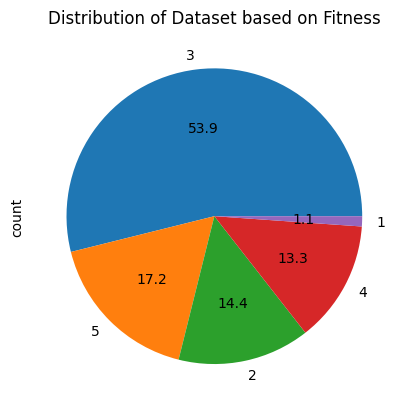

In [17]:
df['Fitness'].value_counts().plot(kind='pie',autopct="%.1f")
plt.title('Distribution of Dataset based on Fitness')
plt.show()

**Inference:** <br/>
Mostly, users have given themselves a rating of 3.

### Usage

In [18]:
df['Usage'].value_counts()

Usage
3    69
4    52
2    33
5    17
6     7
7     2
Name: count, dtype: int64

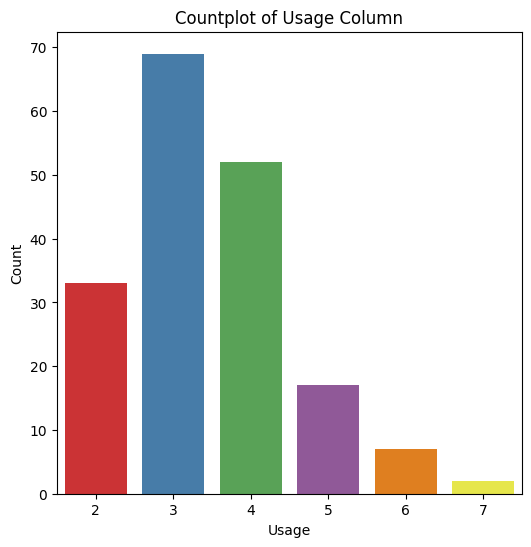

In [19]:
plt.figure(figsize=(6, 6))
sns.countplot(x='Usage', data=df, palette='Set1')
plt.xlabel('Usage')
plt.ylabel('Count')
plt.title('Countplot of Usage Column')
plt.show()

### Income

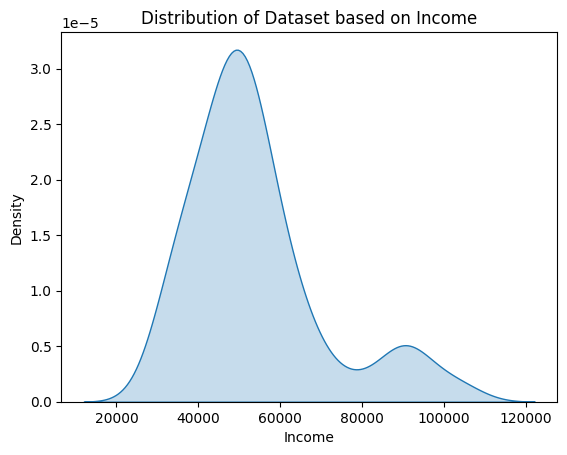

In [20]:
sns.kdeplot(df['Income'], fill=True)
plt.title('Distribution of Dataset based on Income')
plt.show()

### Miles

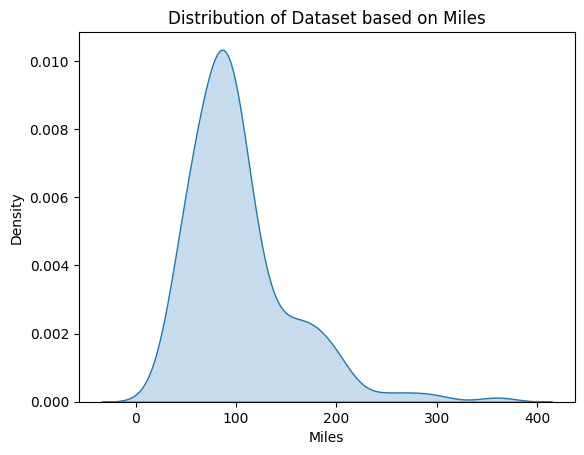

In [21]:
sns.kdeplot(df['Miles'], fill=True)
plt.title('Distribution of Dataset based on Miles')
plt.show()

**Inference:** <br/>
Upon examination of both the KDE for Miles & Income, it is evident that there are outliers present.

## Detecting Outliers

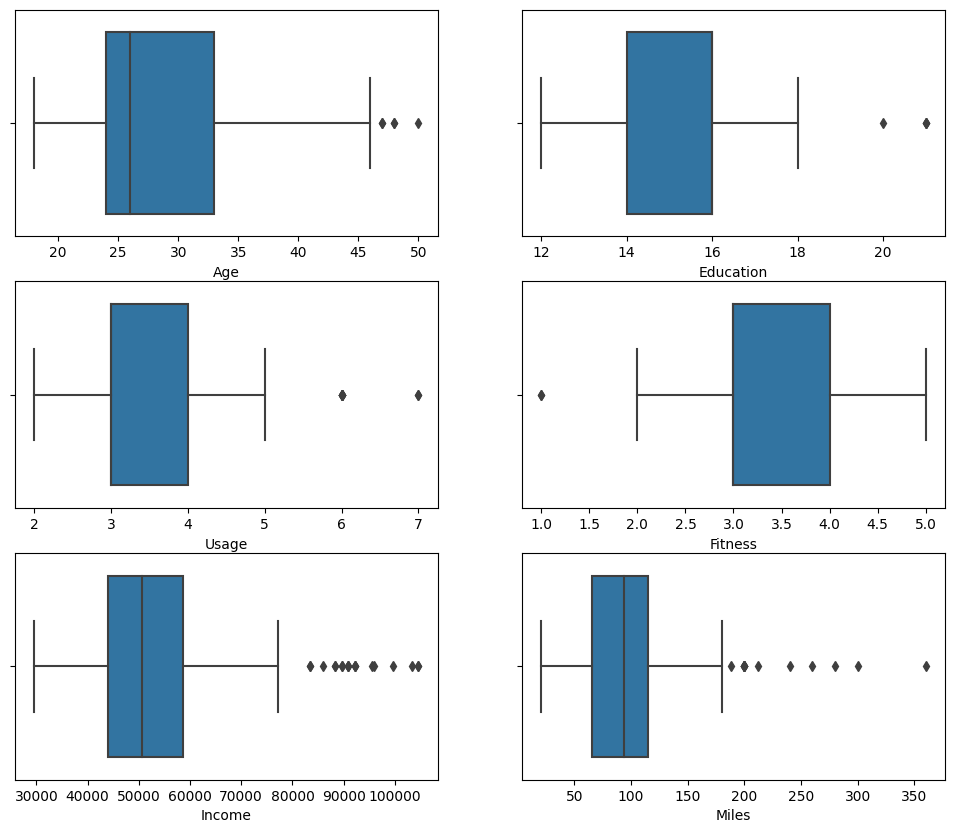

In [22]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

sns.boxplot(data=df, x="Age", orient='h', ax=axis[0,0])
sns.boxplot(data=df, x="Education", orient='h', ax=axis[0,1])
sns.boxplot(data=df, x="Usage", orient='h', ax=axis[1,0])
sns.boxplot(data=df, x="Fitness", orient='h', ax=axis[1,1])
sns.boxplot(data=df, x="Income", orient='h', ax=axis[2,0])
sns.boxplot(data=df, x="Miles", orient='h', ax=axis[2,1])
plt.show()

### Income Column

In [23]:
df['Income'].describe()

count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64

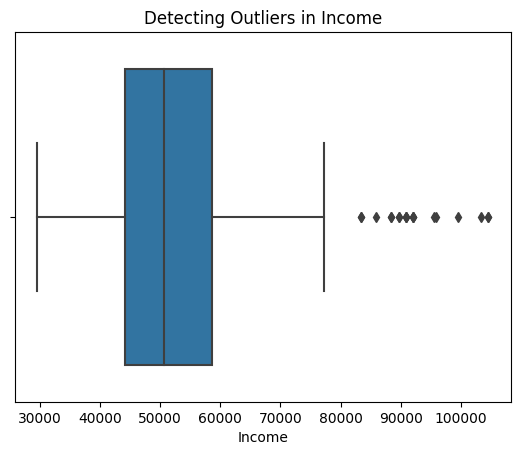

In [24]:
sns.boxplot(x='Income', data=df)
plt.title('Detecting Outliers in Income')
plt.show()

In [25]:
income_25 = df.Income.quantile(0.25)
income_75 = df.Income.quantile(0.75)
income_median = df.Income.median()

lower_limit = income_25 - 1.5*(income_75 - income_25)
upper_limit = income_75 + 1.5*(income_75 - income_25)

print(f'Lower limit: {lower_limit}\nUpper limit: {upper_limit}\nMedian: {income_median}')
print(f"Outliers: {round((len(df.loc[df['Income']>upper_limit])/len(df))*100,2)}%")

Lower limit: 22144.875
Upper limit: 80581.875
Median: 50596.5
Outliers: 10.56%


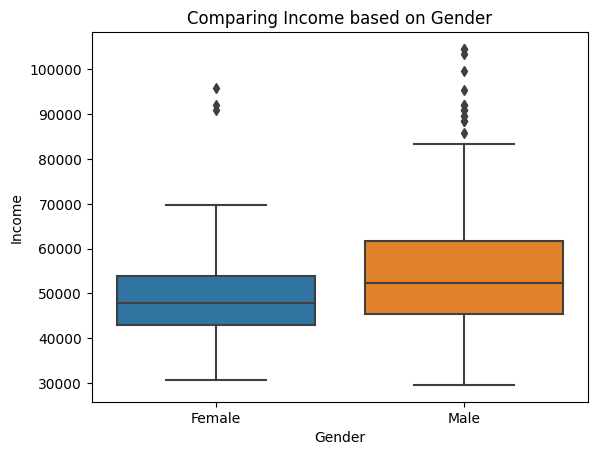

In [26]:
sns.boxplot(data=df, x='Gender', y='Income')
plt.title('Comparing Income based on Gender')
plt.show()

### Miles Column

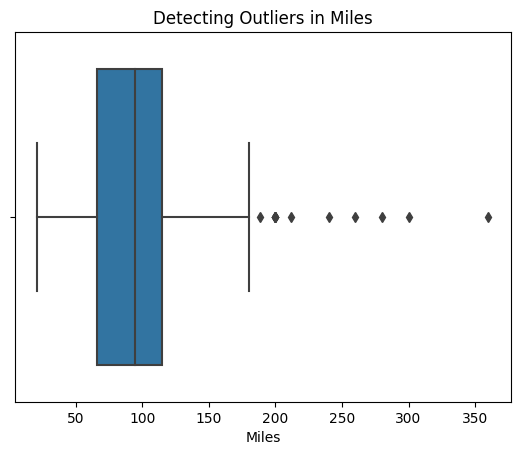

In [27]:
sns.boxplot(x='Miles', data=df)
plt.title('Detecting Outliers in Miles')
plt.show()

In [28]:
miles_25 = df.Miles.quantile(0.25)
miles_75 = df.Miles.quantile(0.75)
miles_median = df.Miles.median()

lower_limit = miles_25 - 1.5*(miles_75 - miles_25)
upper_limit = miles_75 + 1.5*(miles_75 - miles_25)

print(f'Lower limit: {lower_limit}\nUpper limit: {upper_limit}\nMedian: {miles_median}')
print(f"Outliers: {round((len(df.loc[df['Miles']>upper_limit])/len(df))*100,2)}%")

Lower limit: -7.125
Upper limit: 187.875
Median: 94.0
Outliers: 7.22%


**Inference:** <br/>
After analyzing the boxplot, it becomes apparent that Age, Education, and Usage exhibit very few outliers, whereas Income and Miles show a higher prevalence of outliers. A more detailed examination reveals that Income has approximately 10.56% outliers, while Miles have around 7.22%.

## Bivariate Analysis

### Gender v/s Product

In [29]:
df.groupby('Product',observed=False)['Gender'].value_counts().reset_index()

,Product,Gender,count
0,KP281,Female,40
1,KP281,Male,40
2,KP481,Male,31
3,KP481,Female,29
4,KP781,Male,33
5,KP781,Female,7


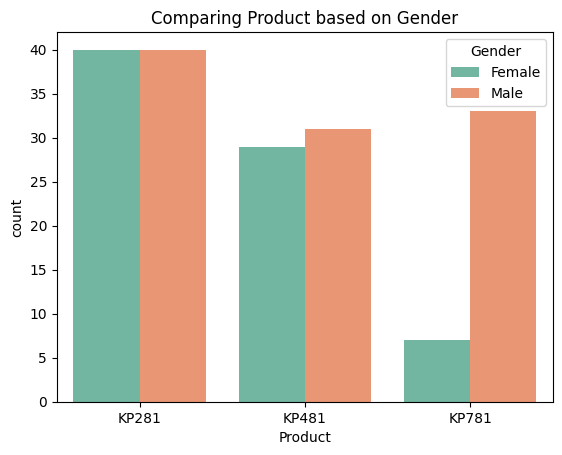

In [30]:
sns.countplot(data=df, x='Product', hue='Gender', palette='Set2')
plt.title('Comparing Product based on Gender')
plt.show()

**Inference:** <br/>
The countplot indicates a balanced distribution between males and females for the KP281 and KP481 products, with both genders showing nearly equal preferences. However, there is a notable difference for the KP781 product, where a significantly larger number of males have KP781.


### MaritalStatus v/s Product

In [31]:
df.groupby('Product',observed=False)['MaritalStatus'].value_counts().reset_index()

,Product,MaritalStatus,count
0,KP281,Partnered,48
1,KP281,Single,32
2,KP481,Partnered,36
3,KP481,Single,24
4,KP781,Partnered,23
5,KP781,Single,17


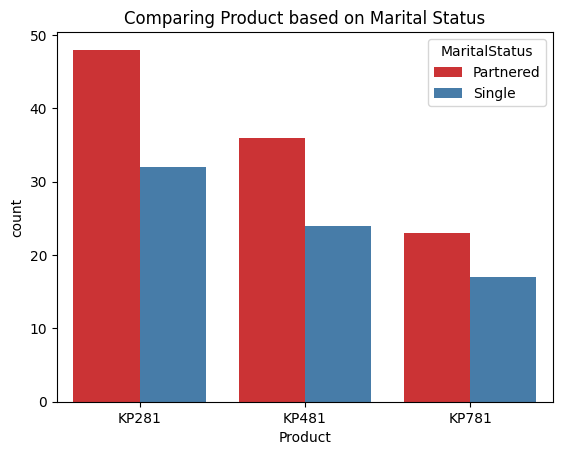

In [32]:
sns.countplot(data=df, x='Product', hue='MaritalStatus', palette='Set1')
plt.title('Comparing Product based on Marital Status')
plt.show()

**Inference:** <br/>
Customers in a partnered relationship are more inclined to purchase treadmill models KP281, KP481, and KP781 compared to those who are single


### Age v/s Product

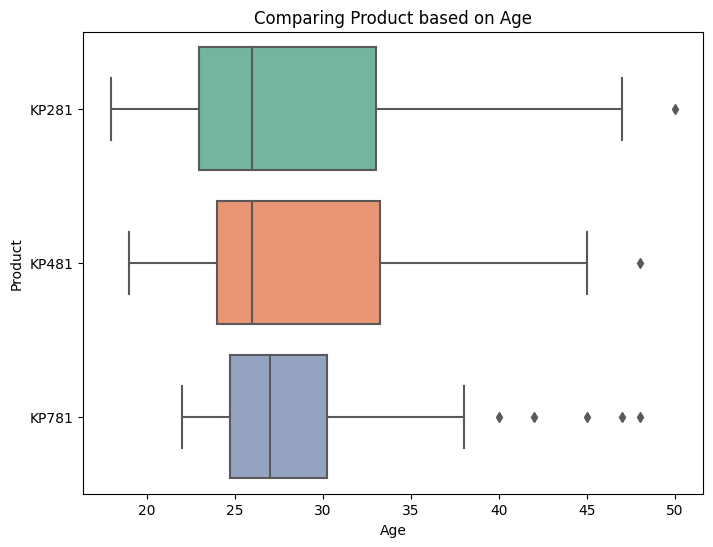

In [33]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Age', y='Product', data=df, palette='Set2')
plt.title('Comparing Product based on Age')
plt.show()

**Inference:** <br/>
The KP281 treadmill is owned across all age groups, whereas the KP781 treadmill is predominantly favored by young and middle-aged individuals.


### Income v/s Product

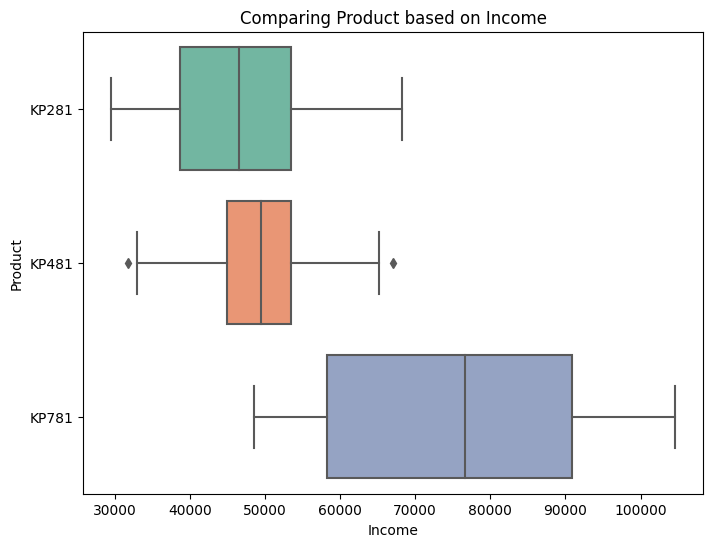

In [34]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Income', y='Product', data=df, palette='Set2')
plt.title('Comparing Product based on Income')
plt.show()

**Inference:** <br/>
The ownership of KP781 is primarily associated with individuals earning an income higher than 50,000, whereas KP281 and KP481 are predominantly owned by those with incomes below 60,000.


### Age v/s Miles & Income

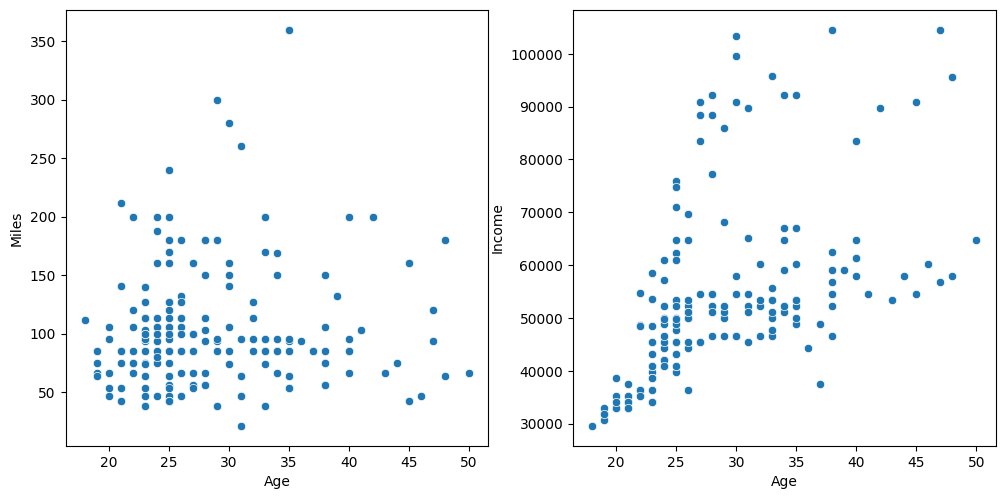

In [35]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
fig.subplots_adjust(top=1.2)

sns.scatterplot(data=df, x="Age",y='Miles', ax=axis[0])
sns.scatterplot(data=df, x="Age",y='Income', ax=axis[1])
plt.show()

**Inference:** <br/>
Age exhibits a direct proportionality with income and an inverse or linear relationship with miles


## Representing the Probability

### Find the marginal probability

In [36]:
df['Product'].value_counts(normalize=True).round(2)

Product
KP281    0.44
KP481    0.33
KP781    0.22
Name: proportion, dtype: float64

**Inference:** <br/>
The probability of the user purchasing KP281 is at its peak, reaching 0.44, while the likelihood of acquiring KP781 is comparatively lower, hovering around 0.22.


### Finding out the probability. Which treadmill does a person purchase according to the Gender

In [37]:
prob_per_vs_gen = pd.crosstab(index=df['Product'],columns=df['Gender'],margins=True,margins_name='Total',normalize=True).round(2)
prob_per_vs_gen

Gender,Female,Male,Total
Product,,,
KP281,0.22,0.22,0.44
KP481,0.16,0.17,0.33
KP781,0.04,0.18,0.22
Total,0.42,0.58,1.00


In [38]:
print(f"P(Male): {prob_per_vs_gen.loc['Total']['Male']}")
print(f"P(Female): {prob_per_vs_gen.loc['Total']['Female']}\n")

print(f"P(KP281|Male): {prob_per_vs_gen.loc['KP281']['Male']}")
print(f"P(KP481|Male): {prob_per_vs_gen.loc['KP481']['Male']}")
print(f"P(KP781|Male): {prob_per_vs_gen.loc['KP781']['Male']}\n")

print(f"P(KP281|Female): {prob_per_vs_gen.loc['KP281']['Female']}")
print(f"P(KP481|Female): {prob_per_vs_gen.loc['KP481']['Female']}")
print(f"P(KP781|Female): {prob_per_vs_gen.loc['KP781']['Female']}")

P(Male): 0.58
P(Female): 0.42

P(KP281|Male): 0.22
P(KP481|Male): 0.17
P(KP781|Male): 0.18

P(KP281|Female): 0.22
P(KP481|Female): 0.16
P(KP781|Female): 0.04


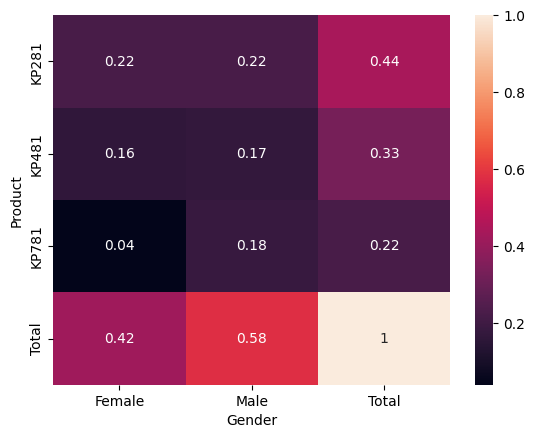

In [39]:
sns.heatmap(prob_per_vs_gen,annot = True)
plt.show()

**Inference:** <br/>
In the table above, we observe the probabilities associated with gender and the corresponding likelihood of users purchasing one of the three models. Additionally, our analysis encompasses both conditional and marginal probabilities.


### Finding out the probability. Which treadmill does a person purchase according to the Marital Status

In [40]:
prob_per_vs_mar = pd.crosstab(index=df['Product'],columns=df['MaritalStatus'],margins=True,margins_name='Total',normalize=True).round(2)
prob_per_vs_mar

MaritalStatus,Partnered,Single,Total
Product,,,
KP281,0.27,0.18,0.44
KP481,0.20,0.13,0.33
KP781,0.13,0.09,0.22
Total,0.59,0.41,1.00


In [41]:
print(f"P(Partnered): {prob_per_vs_mar.loc['Total']['Partnered']}")
print(f"P(Single): {prob_per_vs_mar.loc['Total']['Single']}\n")

print(f"P(KP281|Partnered): {prob_per_vs_mar.loc['KP281']['Partnered']}")
print(f"P(KP481|Partnered): {prob_per_vs_mar.loc['KP481']['Partnered']}")
print(f"P(KP781|Partnered): {prob_per_vs_mar.loc['KP781']['Partnered']}\n")

print(f"P(KP281|Single): {prob_per_vs_mar.loc['KP281']['Single']}")
print(f"P(KP481|Single): {prob_per_vs_mar.loc['KP481']['Single']}")
print(f"P(KP781|Single): {prob_per_vs_mar.loc['KP781']['Single']}")

P(Partnered): 0.59
P(Single): 0.41

P(KP281|Partnered): 0.27
P(KP481|Partnered): 0.2
P(KP781|Partnered): 0.13

P(KP281|Single): 0.18
P(KP481|Single): 0.13
P(KP781|Single): 0.09


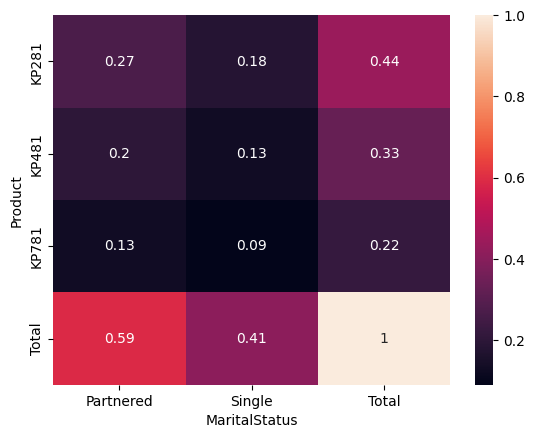

In [42]:
sns.heatmap(prob_per_vs_mar,annot = True)
plt.show()

**Inference:** <br/>
In the provided table, the probabilities are delineated based on marital status, indicating the likelihood of the user opting for a specific model among the three available choices.


### Finding out the probability. Which treadmill a person purchase according to the Age Group

In [43]:
prob_per_vs_age = pd.crosstab(index=df['Product'],columns=df['Age_Category'],margins=True,margins_name='Total',normalize=True).round(2)
prob_per_vs_age

Age_Category,Young,Mid-aged,Old,Total
Product,,,,
KP281,0.29,0.11,0.04,0.44
KP481,0.18,0.12,0.03,0.33
KP781,0.15,0.04,0.03,0.22
Total,0.63,0.28,0.09,1.00


In [44]:
print(f"P(Young): {prob_per_vs_age.loc['Total']['Young']}")
print(f"P(Mid-aged): {prob_per_vs_age.loc['Total']['Mid-aged']}")
print(f"P(Old): {prob_per_vs_age.loc['Total']['Old']}\n")

print(f"P(KP281|Young): {prob_per_vs_age.loc['KP281']['Young']}")
print(f"P(KP481|Young): {prob_per_vs_age.loc['KP481']['Young']}")
print(f"P(KP781|Young): {prob_per_vs_age.loc['KP781']['Young']}\n")

print(f"P(KP281|Mid-aged): {prob_per_vs_age.loc['KP281']['Mid-aged']}")
print(f"P(KP481|Mid-aged): {prob_per_vs_age.loc['KP481']['Mid-aged']}")
print(f"P(KP781|Mid-aged): {prob_per_vs_age.loc['KP781']['Mid-aged']}\n")

print(f"P(KP281|Old): {prob_per_vs_age.loc['KP281']['Old']}")
print(f"P(KP481|Old): {prob_per_vs_age.loc['KP481']['Old']}")
print(f"P(KP781|Old): {prob_per_vs_age.loc['KP781']['Old']}")

P(Young): 0.63
P(Mid-aged): 0.28
P(Old): 0.09

P(KP281|Young): 0.29
P(KP481|Young): 0.18
P(KP781|Young): 0.15

P(KP281|Mid-aged): 0.11
P(KP481|Mid-aged): 0.12
P(KP781|Mid-aged): 0.04

P(KP281|Old): 0.04
P(KP481|Old): 0.03
P(KP781|Old): 0.03


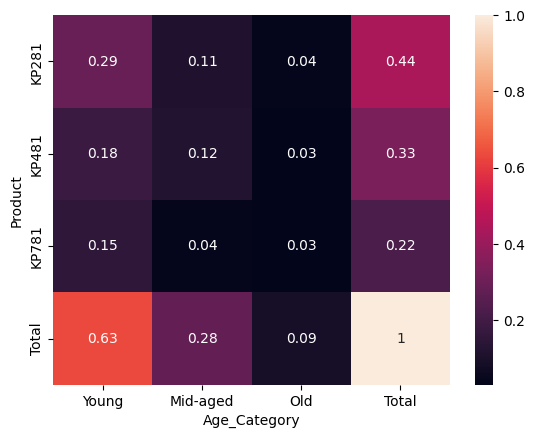

In [45]:
sns.heatmap(prob_per_vs_age,annot = True)
plt.show()

**Inference:** <br/>
In the table above, the probabilities are presented based on the user's age group, indicating the likelihood of purchasing a specific model among the three options.


### Finding out the probability. Which treadmill does a person purchase according to the Income Group

In [46]:
prob_per_vs_income = pd.crosstab(index=df['Product'],columns=df['Income_Category'],margins=True,margins_name='Total',normalize=True).round(2)
prob_per_vs_income

Income_Category,Low,Medium,High,Total
Product,,,,
KP281,0.27,0.18,0.00,0.44
KP481,0.17,0.17,0.00,0.33
KP781,0.03,0.08,0.12,0.22
Total,0.46,0.42,0.12,1.00


In [47]:
print(f"P(Low): {prob_per_vs_income.loc['Total']['Low']}")
print(f"P(Medium): {prob_per_vs_income.loc['Total']['Medium']}")
print(f"P(High): {prob_per_vs_income.loc['Total']['High']}\n")

print(f"P(KP281|Low): {prob_per_vs_income.loc['KP281']['Low']}")
print(f"P(KP481|Low): {prob_per_vs_income.loc['KP481']['Low']}")
print(f"P(KP781|Low): {prob_per_vs_income.loc['KP781']['Low']}\n")

print(f"P(KP281|Medium): {prob_per_vs_income.loc['KP281']['Medium']}")
print(f"P(KP481|Medium): {prob_per_vs_income.loc['KP481']['Medium']}")
print(f"P(KP781|Medium): {prob_per_vs_income.loc['KP781']['Medium']}\n")

print(f"P(KP281|High): {prob_per_vs_income.loc['KP281']['High']}")
print(f"P(KP481|High): {prob_per_vs_income.loc['KP481']['High']}")
print(f"P(KP781|High): {prob_per_vs_income.loc['KP781']['High']}")

P(Low): 0.46
P(Medium): 0.42
P(High): 0.12

P(KP281|Low): 0.27
P(KP481|Low): 0.17
P(KP781|Low): 0.03

P(KP281|Medium): 0.18
P(KP481|Medium): 0.17
P(KP781|Medium): 0.08

P(KP281|High): 0.0
P(KP481|High): 0.0
P(KP781|High): 0.12


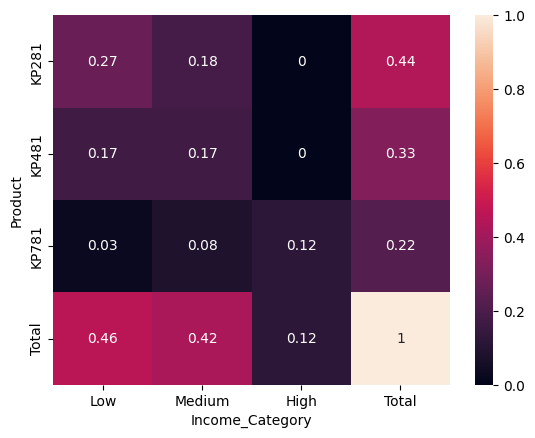

In [48]:
sns.heatmap(prob_per_vs_income,annot = True)
plt.show()

**Inference:** <br/>
In the table above, the probabilities are delineated according to the user's Income Group, indicating the likelihood of selecting a particular model from the three available options.


## Checking the correlation among different factors

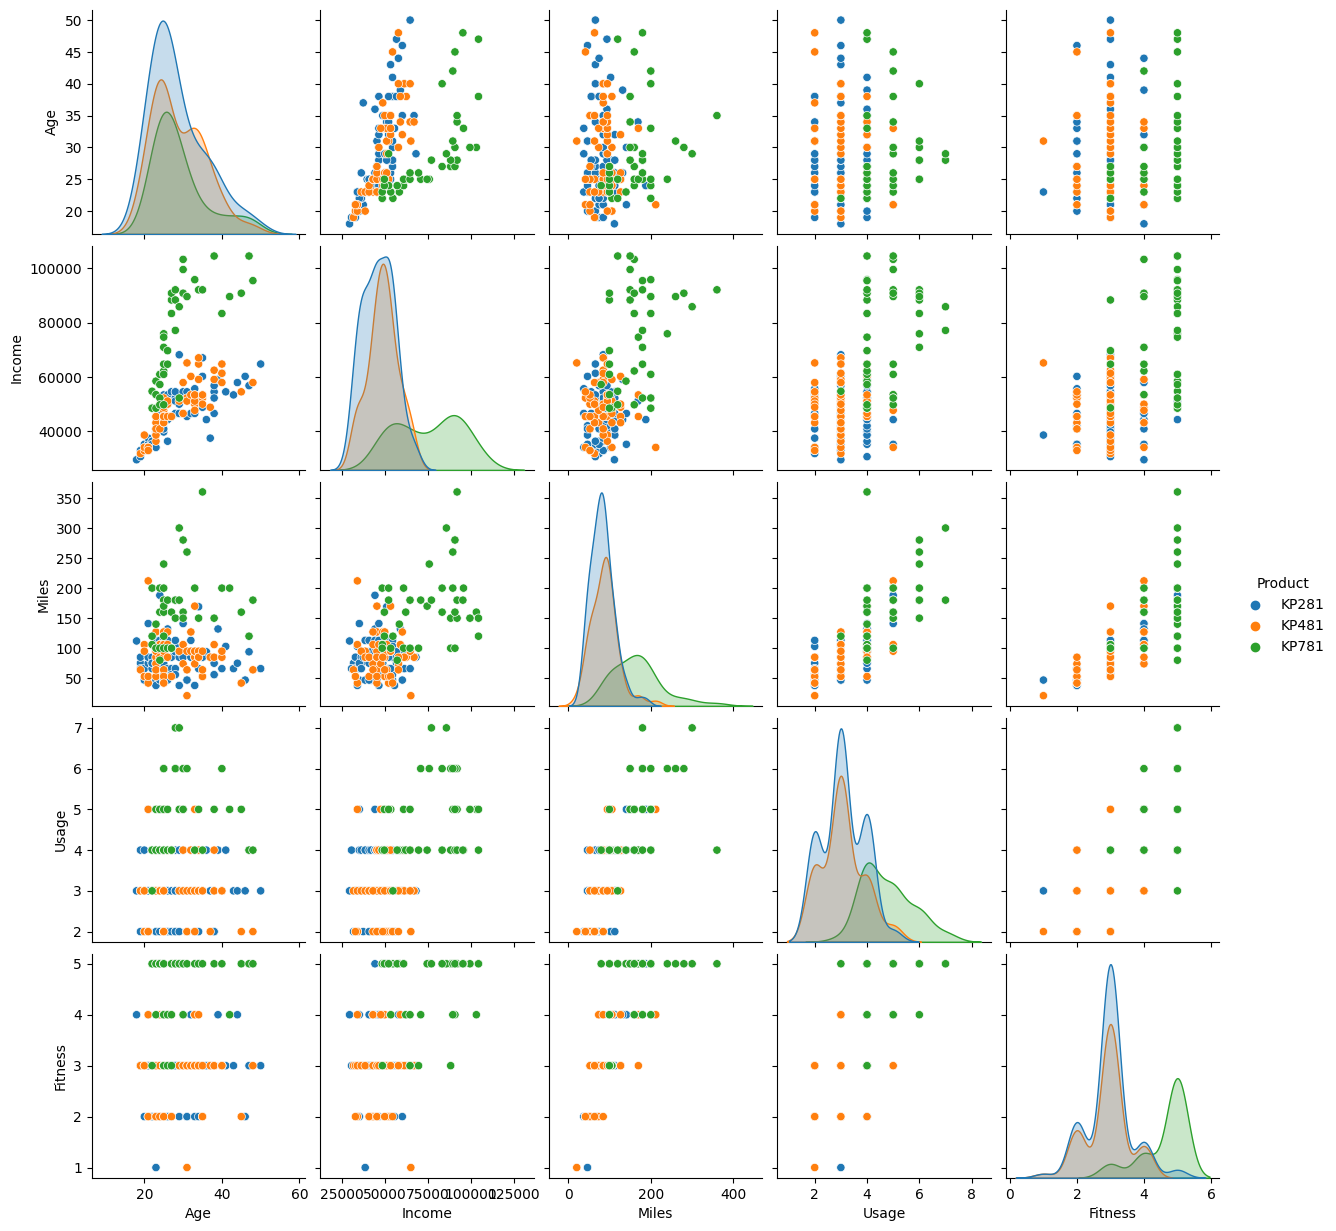

In [49]:
df1 = df[['Age','Income','Miles','Usage','Fitness','Product']]
sns.pairplot(data=df1, hue='Product')
plt.show()

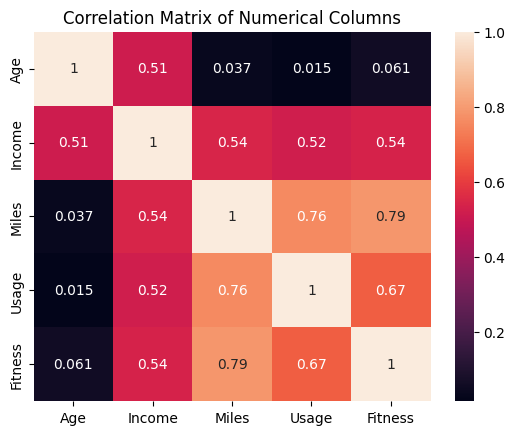

In [50]:
df1 = df[['Age','Income','Miles','Usage','Fitness']]
sns.heatmap(df1.corr(),annot = True)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

**Inference:** <br/>
There exists a positive correlation between age and income, signifying that as age increases, income tends to rise as well. Similarly, there is a positive correlation between income and miles, illustrating that as income increases, the number of miles also tends to increase. While there is a relationship between age and miles, the behavior is somewhat unpredictable. Notably, an increase in usage is associated with a corresponding increase in miles.


## Customer Profiling
**KP281**
* Gender: Both
* Marital Status: Both, preferred Partnered
* Age: 18-28
* Fitness Level: 3
* Income range: 29000 - 50000
* Usage: 3 times a week
* Education: Less than 16 years
* Miles: 70-90 Miles per week

**KP481**
* Gender: Both, preferred Males
* Marital Status: Both, preferred Partnered 
* Age: 20-30
* Fitness Level: 3
* Income range: 30000 - 60000
* Usage: 3 times a week
* Education: Less than 16 years
* Miles: 80-120 Miles per week (Mid-runners)

**KP781**
* Gender: Males
* Marital Status: Both, preferred Partnered 
* Age: 20-30
* Fitness Level: 4-5
* Income range: Above 60000
* Usage: 4 times a week
* Education: Above 16 years
* Miles: Above 120 Miles per week 


## Recommendations
Insights from the data analysis indicate that the KP281 treadmill is the most popular choice among users, followed by the KP481 and KP781 models. To leverage this information for marketing and sales strategies, the following recommendations are proposed:
1. **KP281 Emphasis:**
    * Emphasize the affordability of the KP281 treadmill.
    * Highlight key features appealing to beginners.
    * Introduce special offers to attract budget-conscious customers.
    * Engage with online fitness communities to promote its entry-level appeal.
2. **KP481 Targeting Mid-Level Runners:**
    * Focus marketing efforts on mid-level runners.
    * Highlight competitive pricing and tailored fitness benefits.
    * Utilize various channels for targeted outreach.
3. **KP781 Advanced Features:**
    * Showcase advanced features of KP781 justifying its higher price.
    * Launch targeted campaigns to raise awareness and interest.
4. **Female Customer Engagement:**
    * Create advertisements emphasizing fitness benefits for women.
    * Showcase female-friendly features of Aerofit treadmills.
    * Offer incentives and discounts for the KP781 to increase female purchases.
5. **Engaging Older Customers:**
    * Provide personalized assistance for customers aged 40-50.
    * Ensure guidance and support to maintain an active lifestyle.
6. **Affordability for Low and Middle-Income Groups:**
    * Introduce tailored discounts and incentives for low and middle-income customers.
    * By implementing these strategies, Aerofit can effectively target specific customer segments, maximize sales, and enhance overall customer satisfaction.
